In [170]:
import re
import imageio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import glob

sns.set(style="whitegrid", context="talk")

[AJC 2019 Poll](https://ajc-isabetai.s3.amazonaws.com/polls/poll-nov-2019-crosstabs.pdf)

This poll was conducted Oct. 30 to Nov. 8 for The Atlanta Journal-Constitution by the School of Public and International Affairs Survey Research Center at the University of Georgia and included a total of 1,028 registered voters in Georgia. The margin of error is 3 percentage points.


Do you think the United States is doing enough to address climate change, doing too much,
or do you think more needs to be done to address climate change?



##### Gender

In [171]:
gender = {
    "Doing too\nmuch": [11.1, 5.4, 8.1],
    "Doing enough":  [25.4, 21.4, 23.2],
    "More needs\nto be done": [58.2, 66.3, 62.5],
    "Don't know\nor refused": [5.3, 6.9, 6.1],
}
gender = pd.DataFrame.from_dict(gender, orient="index")
gender.columns = ["Men", "Women", "Total"]
gender.head()

,Men,Women,Total
Doing too\nmuch,11.1,5.4,8.1
Doing enough,25.4,21.4,23.2
More needs\nto be done,58.2,66.3,62.5
Don't know\nor refused,5.3,6.9,6.1


In [172]:
def valid_fname(s):
    """
    Inspired by django:
    https://github.com/django/django/blob/master/django/utils/text.py
    """
    s = str(s).strip().replace(" ", "_")
    return re.sub(r"(?u)[^-\w.]", "", s)

In [201]:
def bold_pies(df, rots=[.5, -.1, -.4], dark=None):
    for i, c in enumerate(df.columns):
        subject = r"$\bf{}$".format(c)
        tail = " in Georgia want climate action"
        ttl = subject + tail if len(subject + tail) < 30 else subject + "\n" + tail
        drk = 0.15 if dark is None else dark[i]
        
        fig, ax = plt.subplots(figsize=(8, 8))
        a = df[c].plot(ax=ax,
                       subplots=True,
                       kind="pie",
                       autopct=lambda p : '{:.2f}%'.format(p),
                       textprops={'color':"w"},
                       colors=sns.cubehelix_palette(rot=rots[i], start=0, gamma=1.2,
                                                    hue=0.8, light=0.7, dark=drk
                                                   ))
        [(
            wedge.set_linewidth(3),
            wedge.set_edgecolor("k"),
            wedge.set_zorder(3)
        ) for i, wedge in enumerate(a[0].patches) if i == 2]
        ax.set_ylabel("")
        lgd = ax.legend(bbox_to_anchor=(1, .7), loc="upper left")
        plt.title(ttl)
        plt.savefig("./output/" + valid_fname("{}_ga_pie.png".format(c.lower())),
                   bbox_extra_artists=(lgd,), bbox_inches='tight')
    return

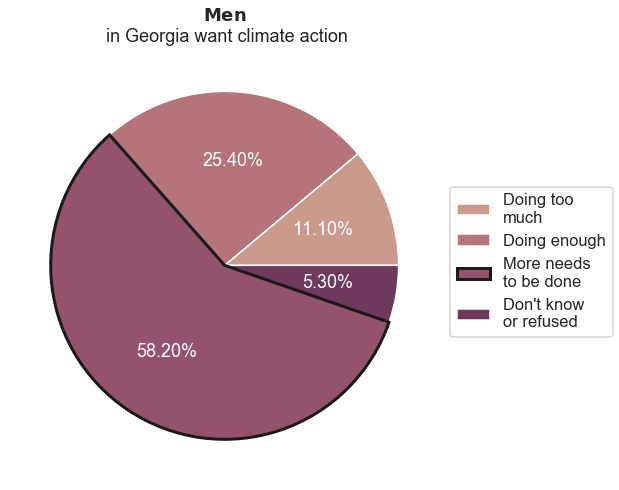

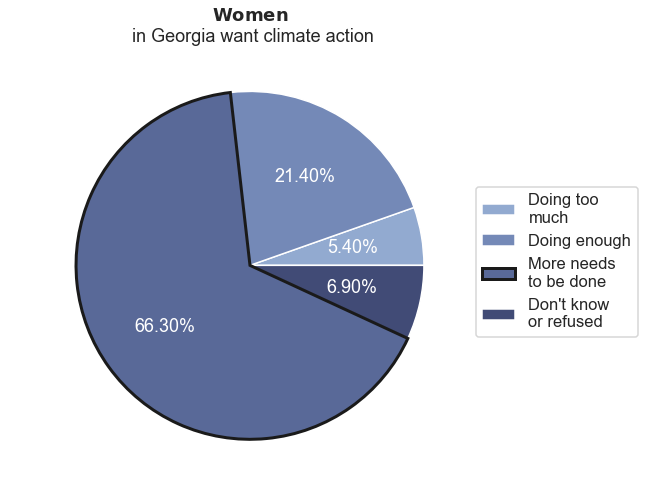

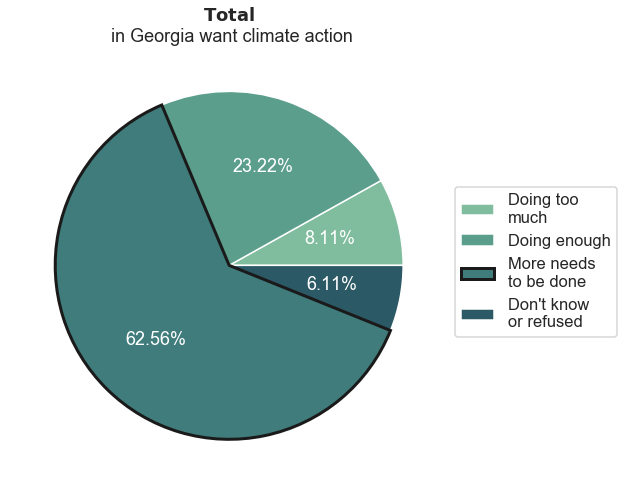

In [203]:
bold_pies(gender)

##### Family income

In [204]:
income = {
    "Doing too\nmuch": [10.2, 18.5, 23.0, 25.9, 29.8, 23.3],
    "Doing enough":  [8.5, 7.3, 8.9, 10.5, 7.6, 6.3],
    "More needs\nto be done": [71.2, 69.1, 61.3, 61.1, 57.3, 66.7],
    "Don't know\nor refused": [10.2, 5.1, 6.8, 2.5, 5.3, 3.7],
}

income = pd.DataFrame.from_dict(income, orient="index")
income.columns = ["Families\:making\:" + amt for amt in ["<\$25K", "\$25-50K", "\$50-75K", "\$75-100K", "\$100-150K", ">\$150K"]]
income.head()

,Families\:making\:<\$25K,Families\:making\:\$25-50K,Families\:making\:\$50-75K,Families\:making\:\$75-100K,Families\:making\:\$100-150K,Families\:making\:>\$150K
Doing too\nmuch,10.2,18.5,23.0,25.9,29.8,23.3
Doing enough,8.5,7.3,8.9,10.5,7.6,6.3
More needs\nto be done,71.2,69.1,61.3,61.1,57.3,66.7
Don't know\nor refused,10.2,5.1,6.8,2.5,5.3,3.7


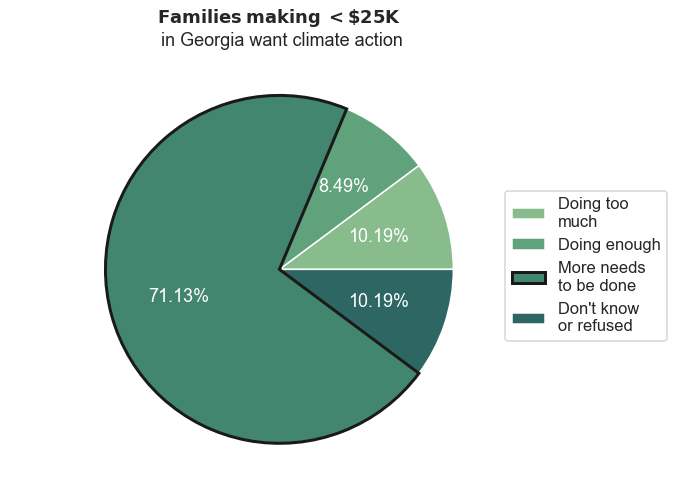

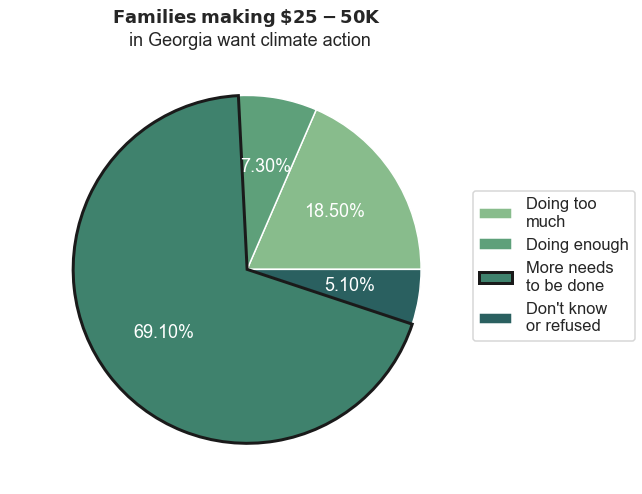

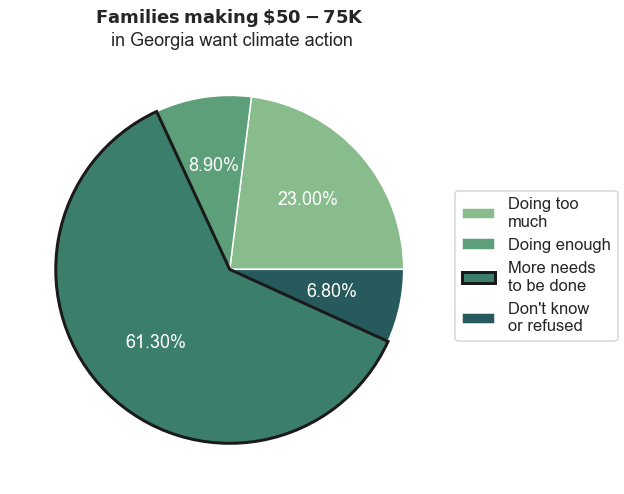

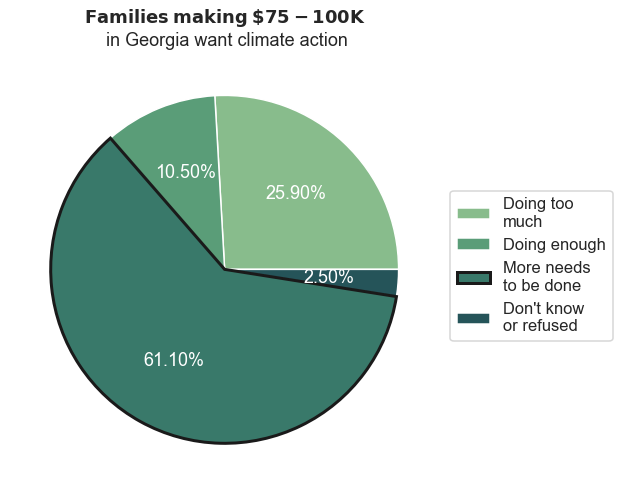

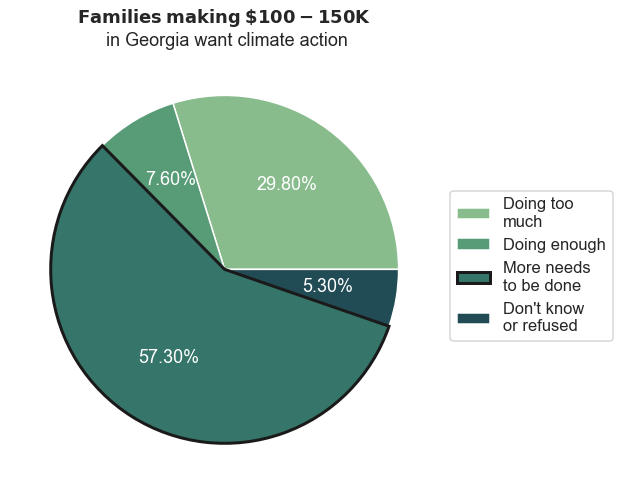

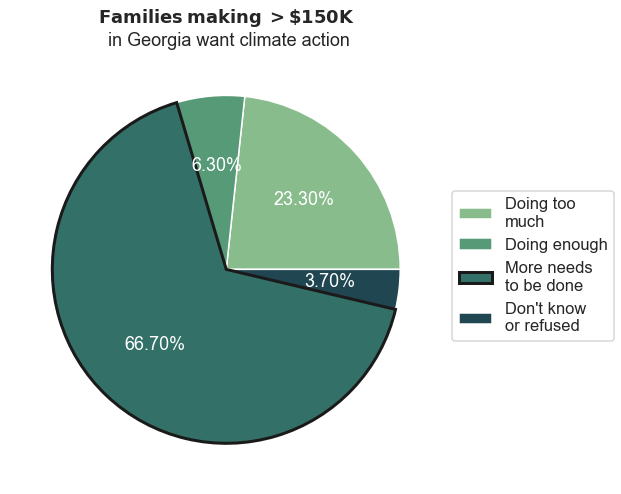

In [205]:
d = np.linspace(.2, 0, 7)
bold_pies(income, rots=[-.5]*income.shape[1], dark=d)

In [206]:
race = {
    "Doing too\nmuch": [31.6, 8.7, 14.4, 23.2,],
    "Doing enough":  [10.8, 2.6, 8.9, 8.2,],
    "More needs\nto be done": [51.4, 84.1, 66.7, 62.6,],
    "Don't know\nor refused": [6.2, 4.5, 10.0, 6.0,],
}

race = pd.DataFrame.from_dict(race, orient="index")
race.columns = ["White\:folks", "Black\:folks", "Other\:races", "All\:types\:of\:people"]
race.head()

,White\:folks,Black\:folks,Other\:races,All\:types\:of\:people
Doing too\nmuch,31.6,8.7,14.4,23.2
Doing enough,10.8,2.6,8.9,8.2
More needs\nto be done,51.4,84.1,66.7,62.6
Don't know\nor refused,6.2,4.5,10.0,6.0


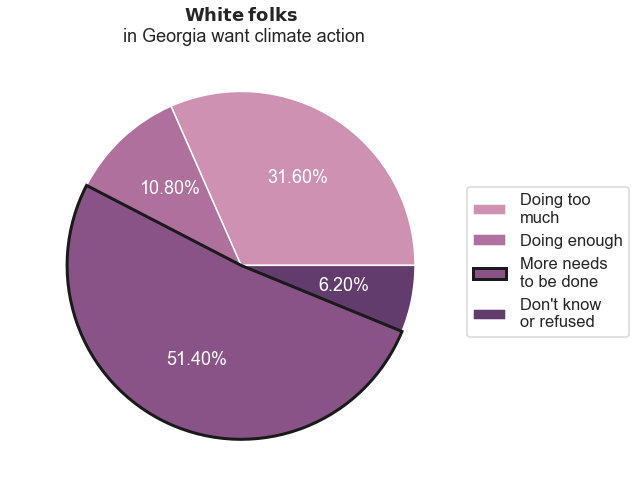

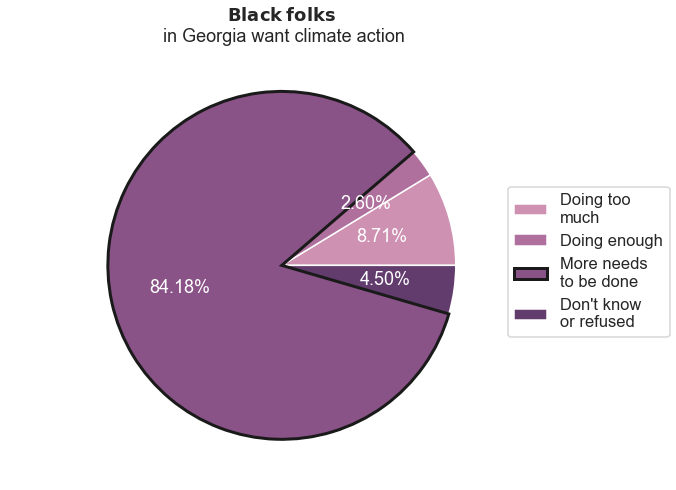

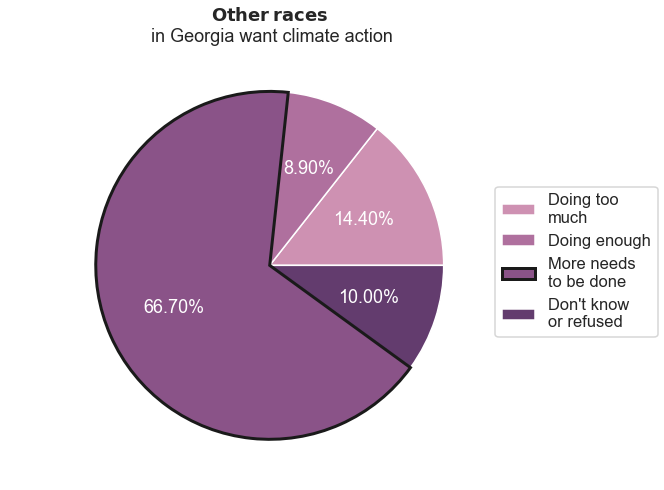

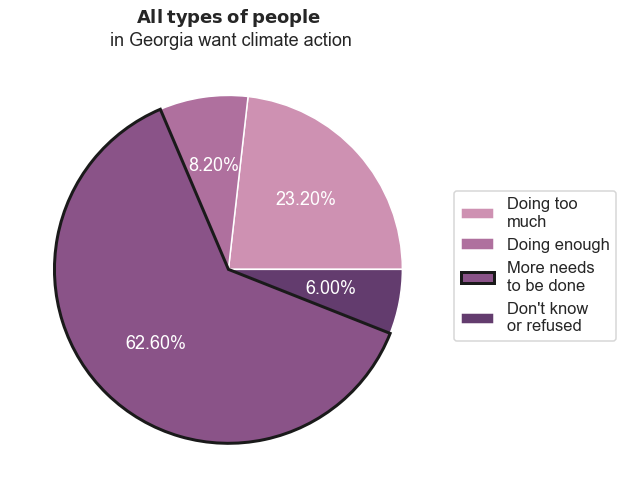

In [207]:
bold_pies(race, rots=[.3]*race.shape[1])

### Make video

In [208]:
files = glob.glob("/Users/austin/Documents/ce4b/20201124/output/*.png")
files

['/Users/austin/Documents/ce4b/20201124/output/allraces_ga_pie.png',
 '/Users/austin/Documents/ce4b/20201124/output/alltypesofpeople_ga_pie.png',
 '/Users/austin/Documents/ce4b/20201124/output/blackfolks_ga_pie.png',
 '/Users/austin/Documents/ce4b/20201124/output/familiesmaking100-150k_ga_pie.png',
 '/Users/austin/Documents/ce4b/20201124/output/familiesmaking150k_ga_pie.png',
 '/Users/austin/Documents/ce4b/20201124/output/familiesmaking25-50k_ga_pie.png',
 '/Users/austin/Documents/ce4b/20201124/output/familiesmaking25k_ga_pie.png',
 '/Users/austin/Documents/ce4b/20201124/output/familiesmaking50-75k_ga_pie.png',
 '/Users/austin/Documents/ce4b/20201124/output/familiesmaking75-100k_ga_pie.png',
 '/Users/austin/Documents/ce4b/20201124/output/men_ga_pie.png',
 '/Users/austin/Documents/ce4b/20201124/output/otherraces_ga_pie.png',
 '/Users/austin/Documents/ce4b/20201124/output/total_ga_pie.png',
 '/Users/austin/Documents/ce4b/20201124/output/whitefolks_ga_pie.png',
 '/Users/austin/Documents/c

Custom order

In [209]:
files = [
    '/Users/austin/Documents/ce4b/20201124/output/women_ga_pie.png',
    '/Users/austin/Documents/ce4b/20201124/output/men_ga_pie.png',
    '/Users/austin/Documents/ce4b/20201124/output/familiesmaking25k_ga_pie.png',
    '/Users/austin/Documents/ce4b/20201124/output/familiesmaking150k_ga_pie.png',
    '/Users/austin/Documents/ce4b/20201124/output/blackfolks_ga_pie.png',
    '/Users/austin/Documents/ce4b/20201124/output/whitefolks_ga_pie.png',
    '/Users/austin/Documents/ce4b/20201124/output/alltypesofpeople_ga_pie.png',
]

In [210]:
imgs = [imageio.imread(im) for im in files]
imageio.mimsave('output/ga_poll.gif', imgs, fps=1)

In [211]:
sns.choose_cubehelix_palette()

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8888663743660877, 0.7106793139856472, 0.7158661451411206],
 [0.8314793143949643, 0.5987041921652179, 0.6530062709235388],
 [0.7588951019517731, 0.49817117746394224, 0.6058723814510268],
 [0.6672565752652589, 0.40671838146419587, 0.5620016466433286],
 [0.5529215689527474, 0.3217924564263954, 0.5093718054521851],
 [0.43082755198027817, 0.24984535814964698, 0.44393960899639856],
 [0.29794615023641036, 0.18145907625614888, 0.3531778140503475],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]